In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Regressão Linear - Exemplo 1

In [3]:
# Definição do dataset
height=[[4.0],[4.5],[5.0],[5.2],[5.4],[5.8],[6.1],[6.2],[6.4],[6.8]]
weight=[42, 44, 49, 55, 53, 58, 60, 64, 66, 69]

Text(0.5, 0, 'Height')

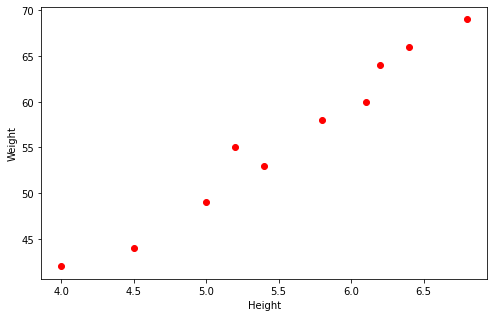

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(height, weight, color='red')
plt.ylabel('Weight')
plt.xlabel('Height')

In [23]:
# Criação do modelo de regressão linear
rl = LinearRegression()

In [24]:
# Treinamento do modelo
rl.fit(height, weight)

LinearRegression()

In [25]:
m = rl.coef_[0]
b = rl.intercept_
print(f'm = {m:.1f}, b = {b:.1f}')
print(f'Equação da reta: y = {m:.1f}x + {b:.1f}')

m = 10.2, b = -0.5
Equação da reta: y = 10.2x + -0.5


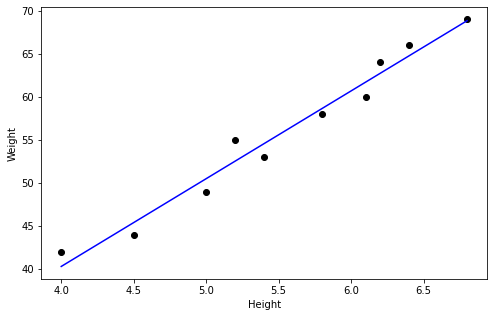

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(height, weight, color='black')
plt.ylabel('Weight')
plt.xlabel('Height')

predicted_values = rl.predict(height)
plt.plot(height, predicted_values, color='blue')

In [48]:
predicted_values = rl.predict([[176]])
predicted_values

array([1793.6047836])

## Regressão Linear - Exemplo 2

In [35]:
# Carregar o dataset boston house prices da biblioteca sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [36]:
print(boston.DESCR) # Mostra a descrição do dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
from sklearn.model_selection import cross_val_score

X = bos.drop('PRICE', axis=1)
y = bos.PRICE

In [39]:
# Cria um modelo de regressão linear
lr = LinearRegression()

In [40]:
# k-fold cross validation com k=10
# A função de custo é o erro quadrático médio

scores = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]


In [41]:
scores.mean()

-34.705255944524936

In [42]:
lr.fit(X,y)

LinearRegression()

In [43]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [44]:
lr.intercept_

36.45948838509015